# Wine dataset prediction
Después de una serie de catas, nos han dado las puntuaciones que las personas que han catado el vino. Tenemos diferentes características de los vinos como la acidez, la volatilidad etc. En este ejercicio nos proponemos predecir la puntuación del vino en base a sus características químicas y físicas.

La puntuación que se da a un vino es una variable continua que toma los valores, concretamente en este ejemplo, de 3 a 9. Cuánto mayor es la puntuación, mejor es la opinión que se tiene de ese vino en concreto. Ésta puntuación será nuestra variable a predecir, de manera que, cuando tengamos nuevos vinos en nuestra base de datos, seamos capaces de saber qué calidad pueden tener.

# Librerías


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsRegressor
import scipy.stats as stats 
from sklearn.preprocessing import MinMaxScaler

# Carga del dataset

In [49]:
path = "/Users/jjmilla/Repositorios/master-umh-stat/master-umh-stat/Estadistica/datos/winequality-white.csv"
data = pd.read_csv(path, sep=";")
data.shape

print("Número de observaciones:", data.shape[0])
print("Variables:", data.shape[1])
print("columns in dataset:", list(data.columns))

data.info()

Número de observaciones: 4898
Variables: 12
columns in dataset: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 no

# Análisis descriptivo

In [50]:
# Descripción de las variables
data.describe()

# Conclusiones
# Las puntuaciones que se dan no están muy bien distribuidas, pues el 75% de los vinos tienen una puntuación menor o igual a 6
# Contamos con una muestra de 4898 puntuaciones y 12 mediciones de diferentes características de los vinos
# No tenemos valores nulos en ninguna de las variables, es un dataset completo e informado.

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

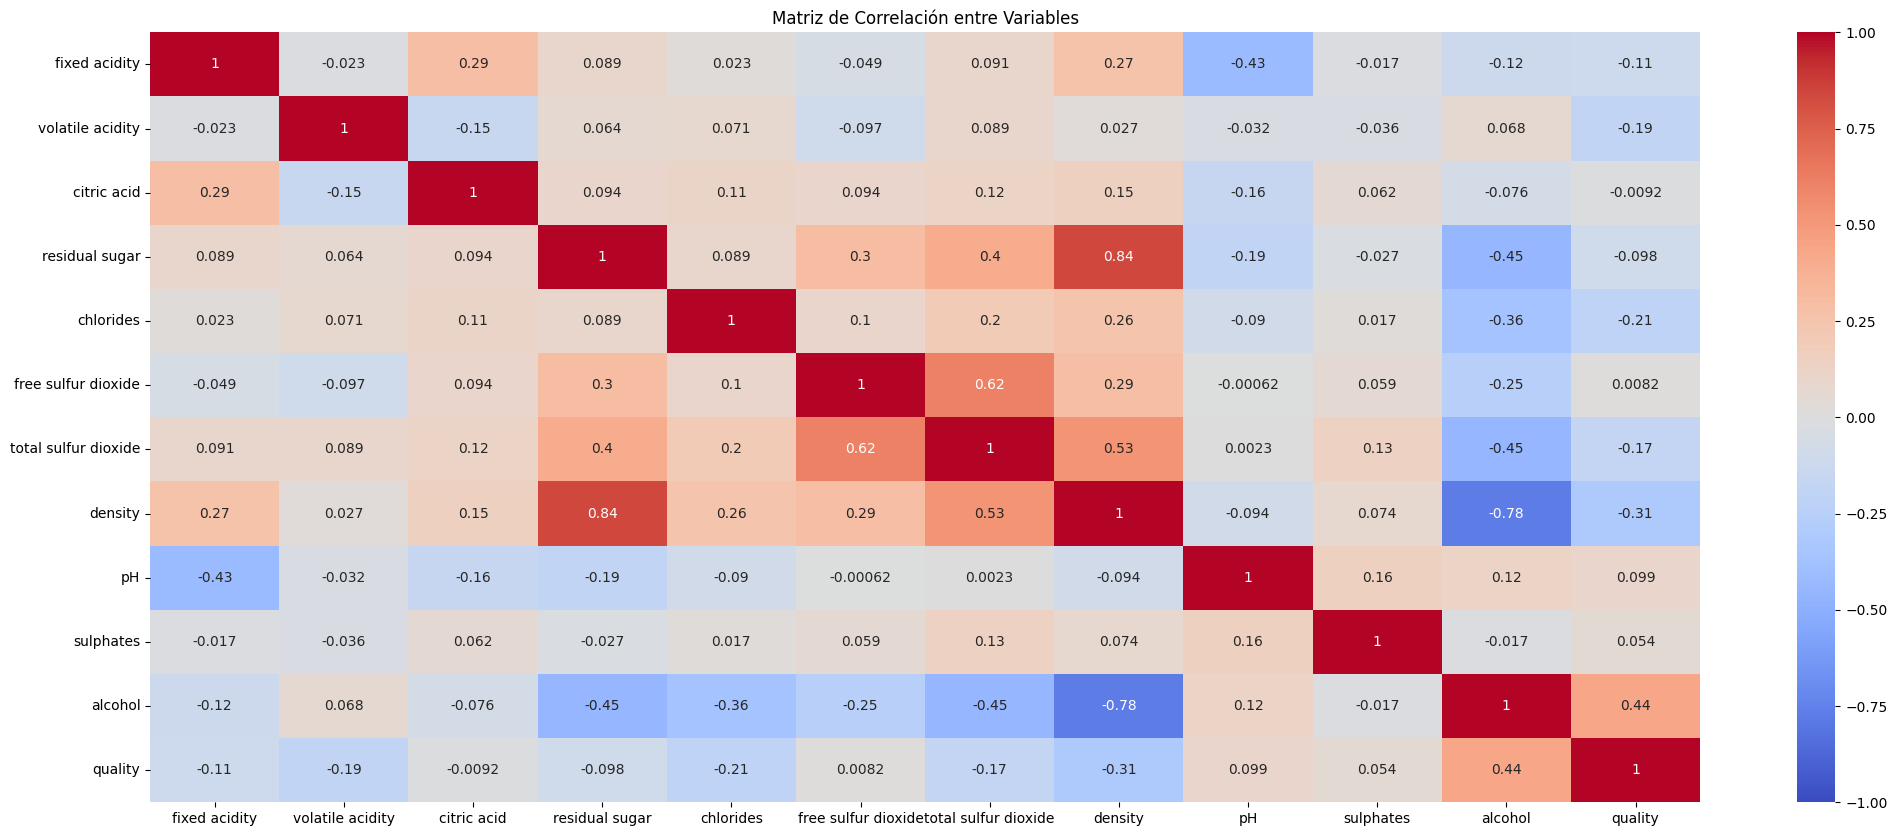

In [51]:
# Correlación de las variables
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Variables")
plt.show()

# Conclusiones
# Las variables más correladas con la puntuación que le dan al vino son: densidad y alcohol.
# No hay fuertes relaciones entre otras variables, pues las correlaciones se encuentran <0.20. --> "correlaciones débiles"

<Axes: xlabel='alcohol', ylabel='quality'>

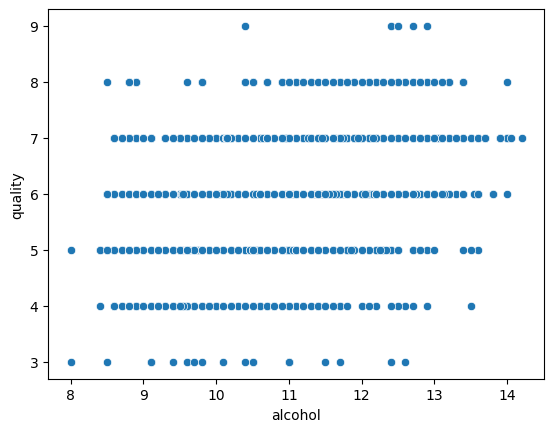

In [52]:
# El alcohol es la primera variable más correlada con la puntuación a la calidad del vino
sns.scatterplot(x="alcohol", y="quality", sizes=(50, 200), data=data)

<Axes: xlabel='density', ylabel='quality'>

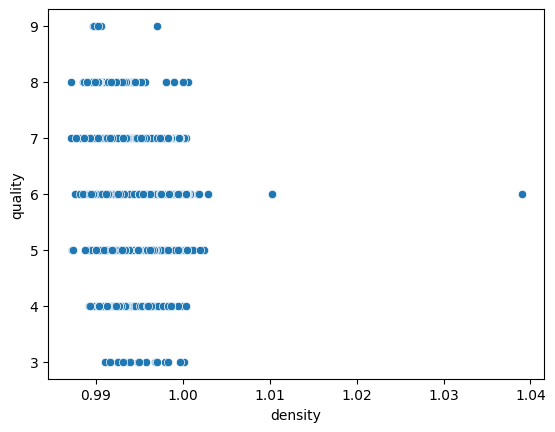

In [53]:
# La densidad es la segunda variable más correlada con la calidad del vino
sns.scatterplot(x="density", y="quality", sizes=(50, 200), data=data)

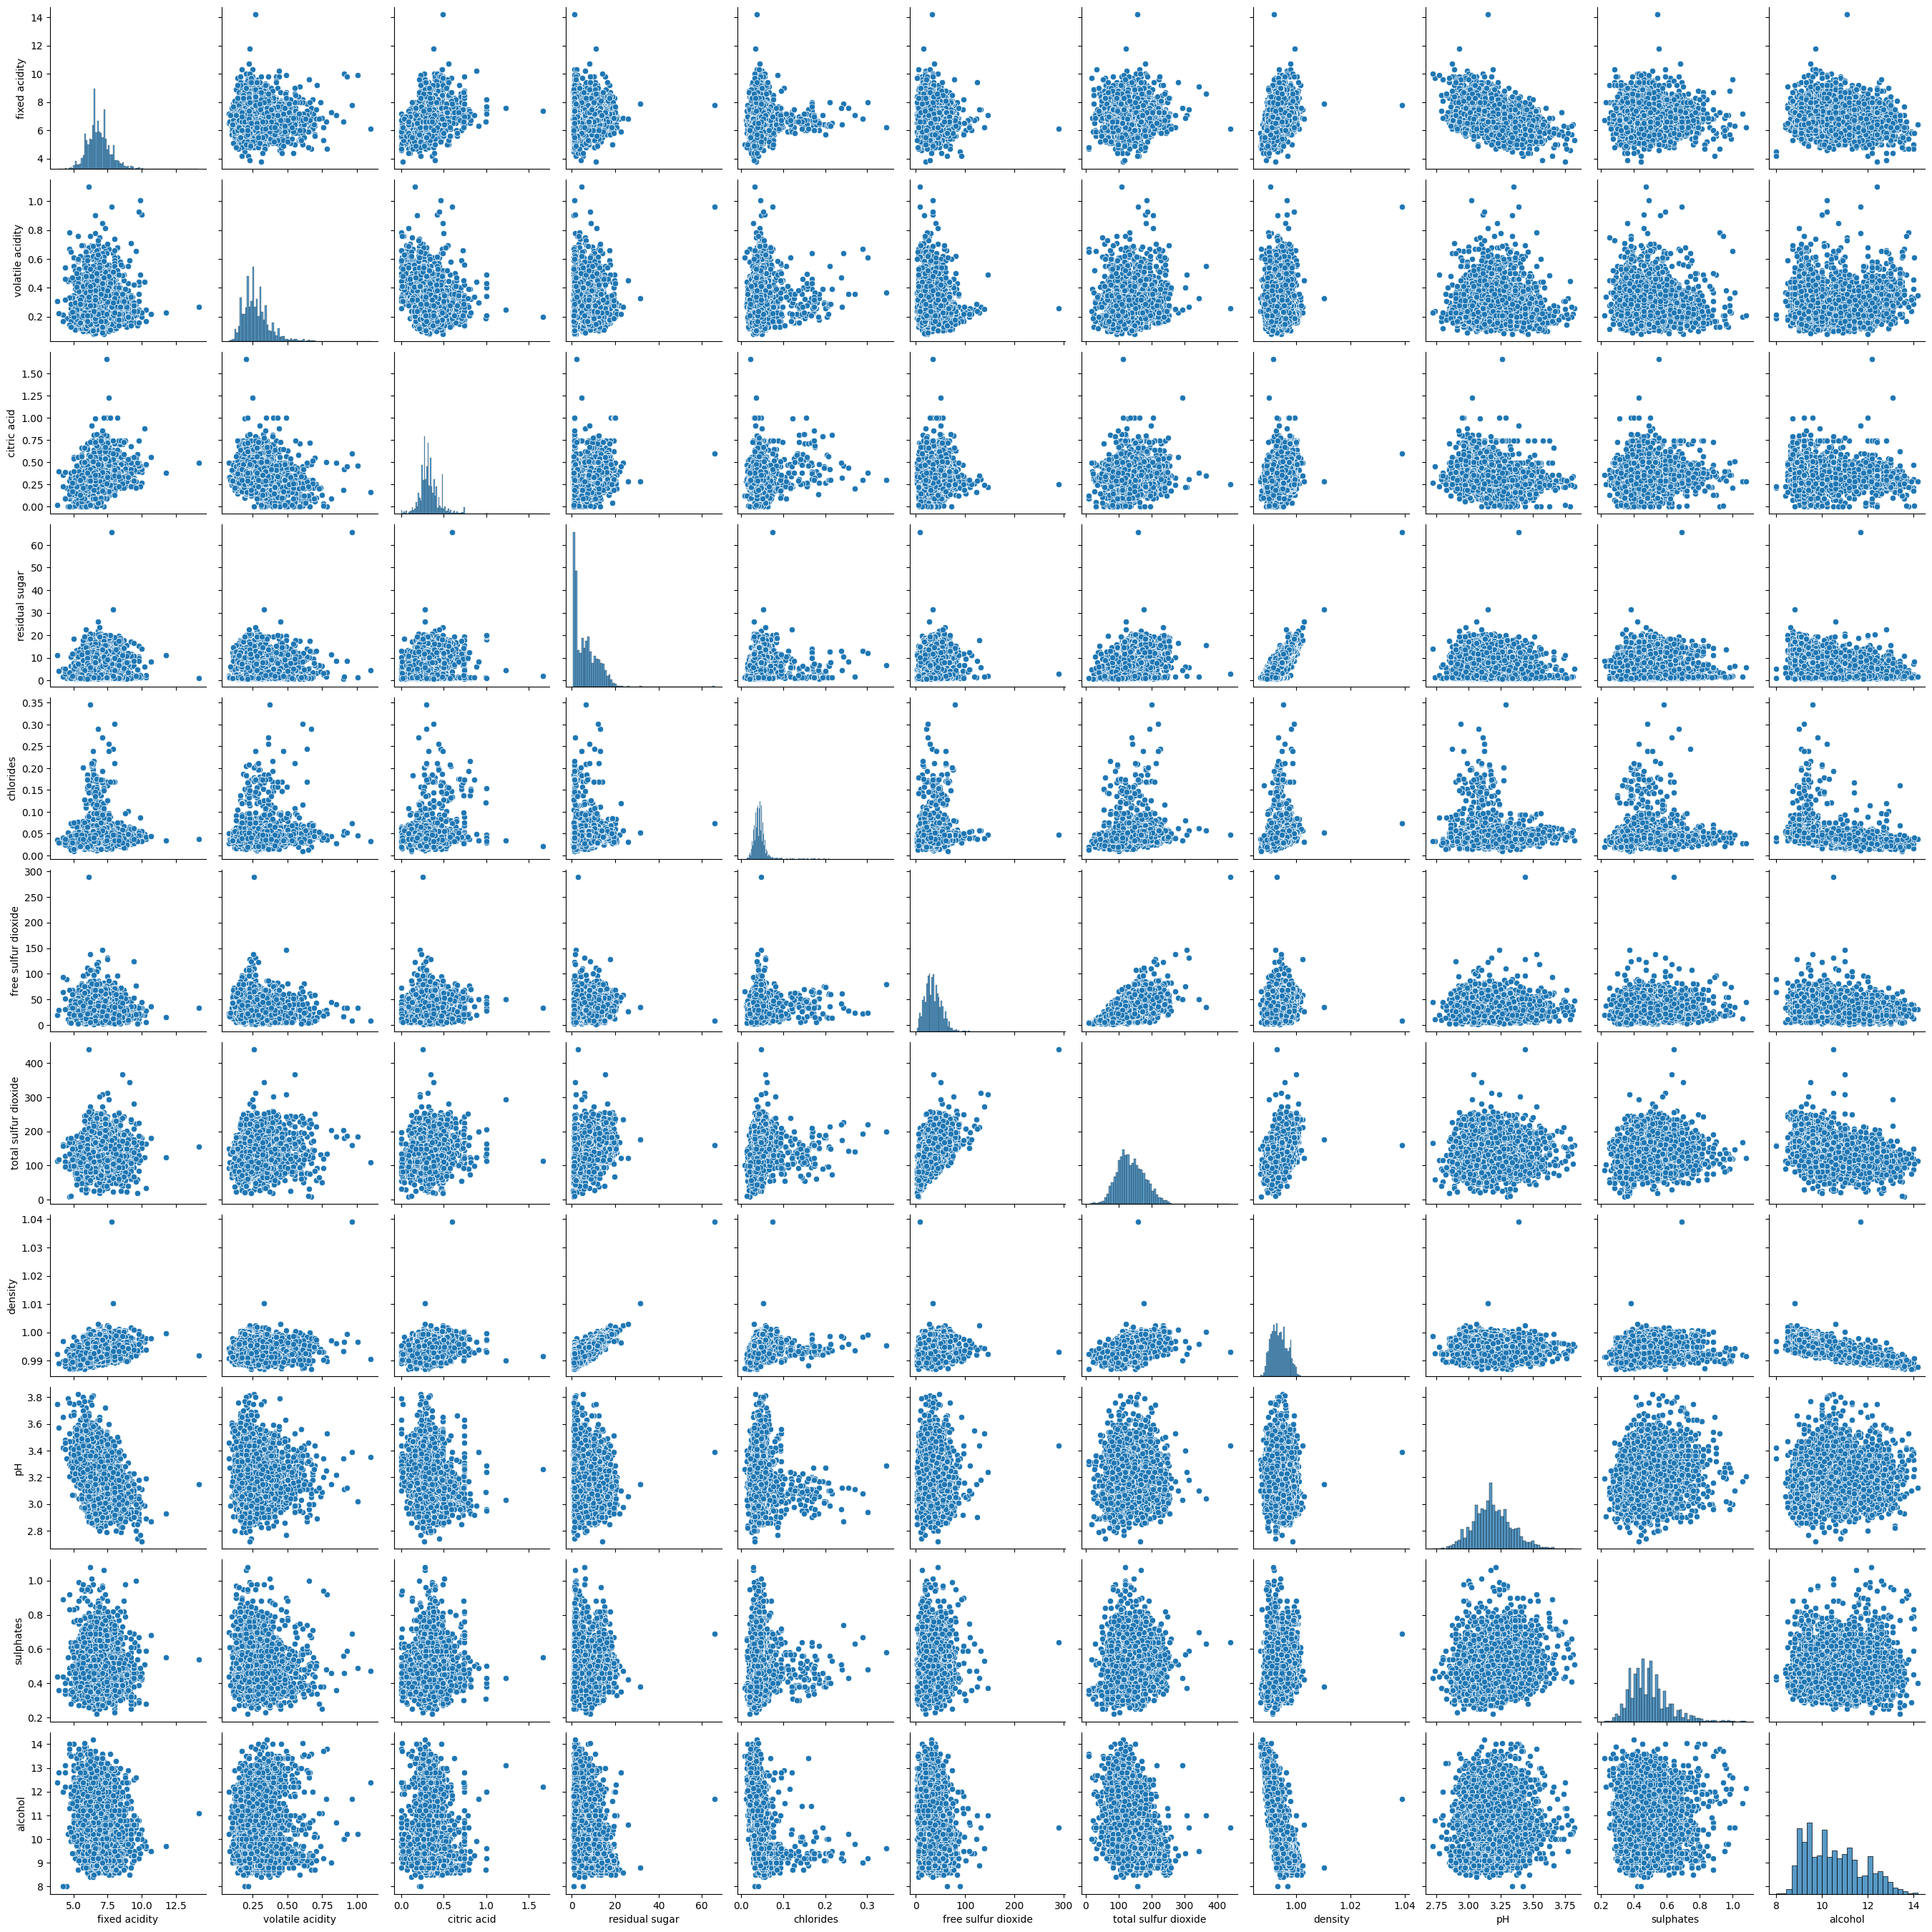

In [54]:
sns.pairplot(data.drop(columns="quality")) 
plt.show()

# Preparación para la modelización - Dataset de train y test

In [55]:
# Separar en variables dependientes e independientes
column_to_predict = "quality"
Y = data[column_to_predict]
X = data.drop(columns=[column_to_predict])

# Escalado de variables independientes
scaler=MinMaxScaler()
X[:]=scaler.fit_transform(X[:])

# Ver las dimensiones
print("Y shape", Y.shape)
print("X shape", X.shape)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

print("Y_train shape", Y_train.shape)
print("Y_test shape", Y_test.shape)


Y shape (4898,)
X shape (4898, 11)
X_train shape (3918, 11)
X_test shape (980, 11)
Y_train shape (3918,)
Y_test shape (980,)


# ¿Qué variable quitar del modelo? - VIF


In [56]:
## VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_VIF(X_df):
    # Calcular el VIF para cada variable independiente (otro método para ver qué variable quitar del modelo)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif_data.sort_values("VIF",ascending=False))

calculate_VIF(X_df=X)

                Variable         VIF
7                density  142.496739
0          fixed acidity   37.898901
10               alcohol   25.492263
3         residual sugar   25.458129
8                     pH   23.041922
6   total sulfur dioxide   22.935941
2            citric acid    9.900727
5    free sulfur dioxide    8.415043
9              sulphates    7.505061
1       volatile acidity    5.479470
4              chlorides    4.565564


In [57]:
def drop_high_vif(data, max_val=10):
     # Function to drop variables with VIF higher than max_val
    end=False
    while(not end):
        # Locating the variables with maximum VIF
        index_to_drop=-1
        vif_max=0
        for i in range(data.shape[1]):
            vif = variance_inflation_factor ( data.values , i ) 
            if vif>vif_max and vif>max_val:
                vif_max=vif
                index_to_drop=i
        
        if index_to_drop>=0:
            # Dropping the variable with maximum VIF
            print(data.columns[index_to_drop])
            column_name_to_drop = data.columns[index_to_drop]
            data = data.drop(column_name_to_drop, axis=1)
        else:
            end=True

# Nos da el orden por el que deberiamos empezar a quitar.
drop_high_vif(X)

density
total sulfur dioxide
fixed acidity


# Modelos

## LinearRegression - all variables
Variables X: 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
Variables Y: 'quality'

In [58]:
# funciones
def linear_regression_coef(X, modelo):
    # Coeficientes e Intercepto
    print(f'X variables: {set(X.columns)}')
    print(f'Coeficientes de la regresión lineal: {modelo.coef_}')
    print(f'Intercepto: {modelo.intercept_}')
    # Diagrama de los coeficientes
    plt.bar(X.columns, modelo.coef_)
    plt.title("Coeficientes del Modelo de Regresión Lineal")
    plt.xlabel("Variables")
    plt.ylabel("Coeficientes")
    plt.xticks(rotation=90)
    plt.show()

def linear_regression_evaluation(X_test, Y_test, modelo):
    # Evaluación del modelo
    Y_pred_test = modelo.predict(X_test)

    # Imprimir las métricas
    R2_lr = r2_score(Y_test, Y_pred_test)
    print(f" LinearRegression - R^2 test: {R2_lr}")
    mse_lr = mean_squared_error(Y_test, Y_pred_test)
    print(f" LinearRegression - MSE test: {mse_lr}")

    return R2_lr, mse_lr, Y_pred_test


### LinearRegression model

X variables: {'fixed acidity', 'density', 'sulphates', 'alcohol', 'free sulfur dioxide', 'pH', 'total sulfur dioxide', 'residual sugar', 'chlorides', 'volatile acidity', 'citric acid'}
Coeficientes de la regresión lineal: [ 0.47743526 -1.953182   -0.10176376  4.6448187  -0.00892212  1.46928322
 -0.10436836 -6.44558016  0.66076984  0.55820259  1.41985384]
Intercepto: 5.412145409402012


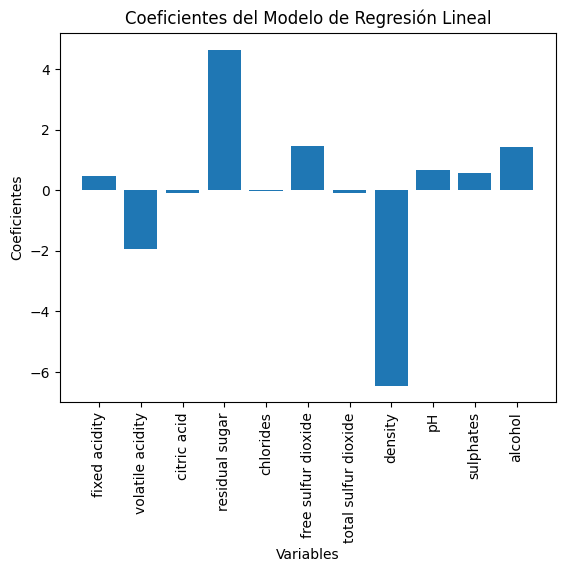

 LinearRegression - R^2 test: 0.2652750042179154
 LinearRegression - MSE test: 0.5690247717229255


In [59]:
# Ajuste del Modelo de Regresión Lineal
modelo= LinearRegression()
modelo.fit(X_train, Y_train)

# Coeficientes del modelo
linear_regression_coef(X, modelo)

# Evaluacion del modelo
f=linear_regression_evaluation(X_test, Y_test, modelo)

# R2 y MSE
r2_all = f[0]
mse_all = f[1]


### LinearRegression - supuestos

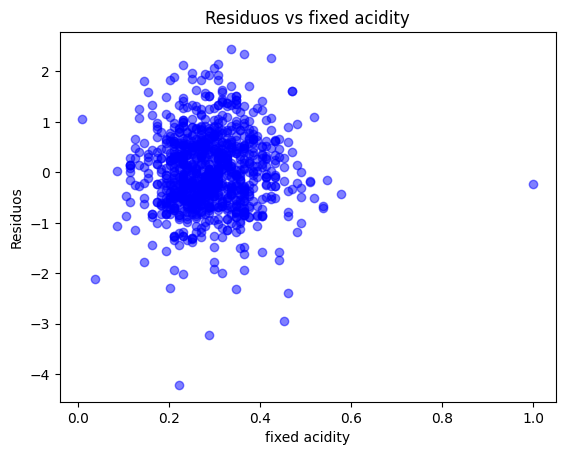

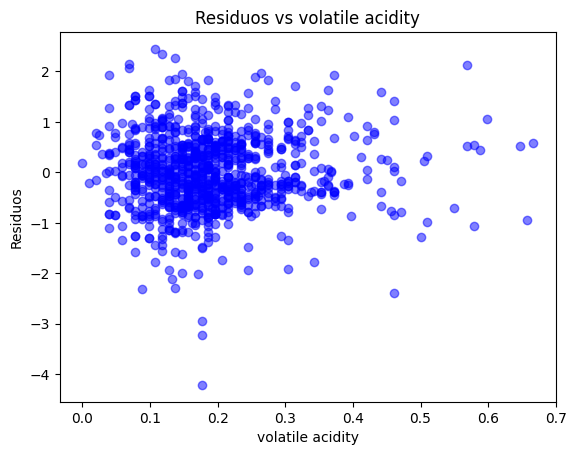

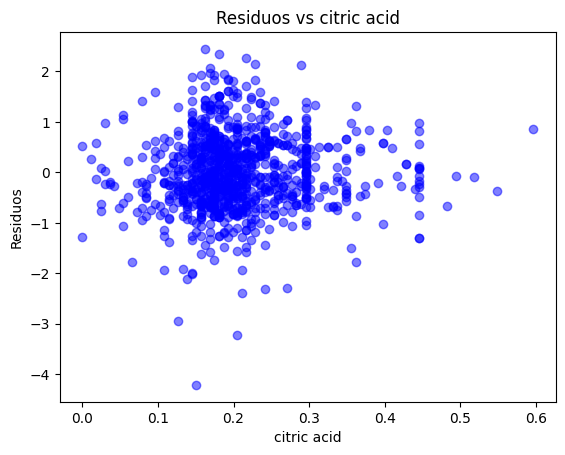

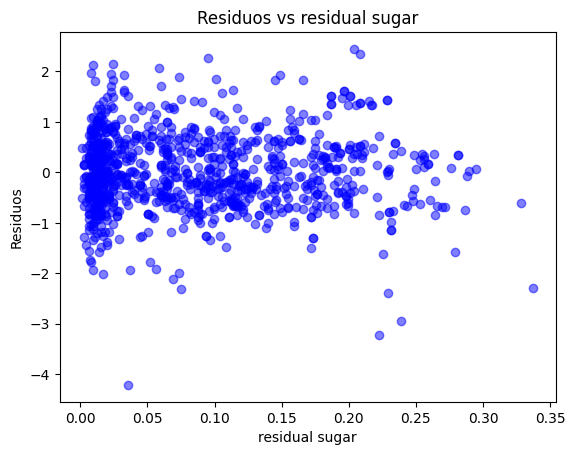

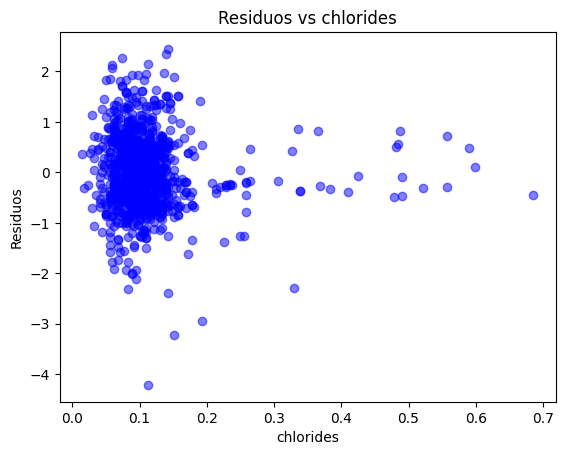

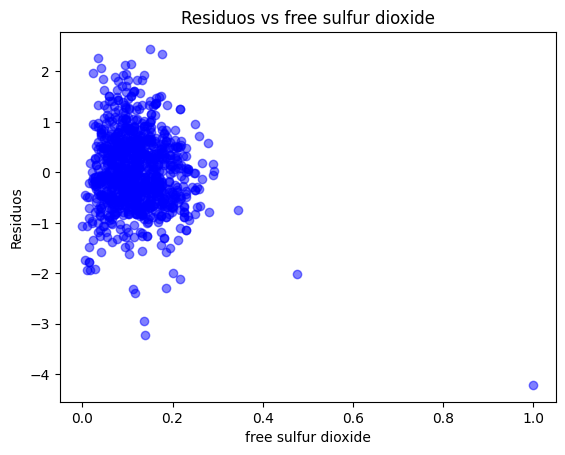

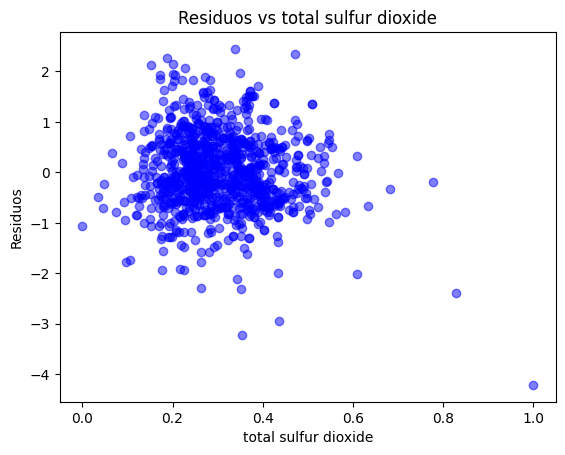

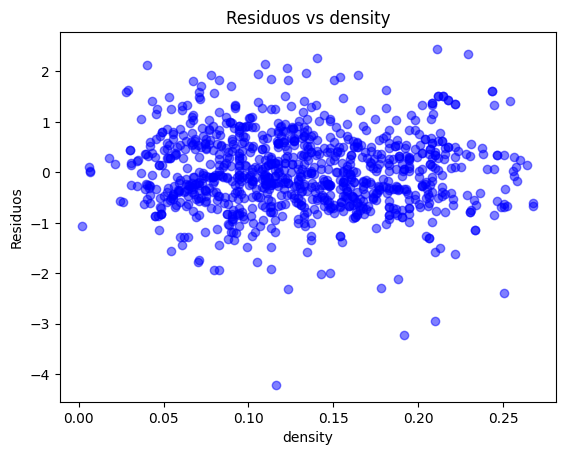

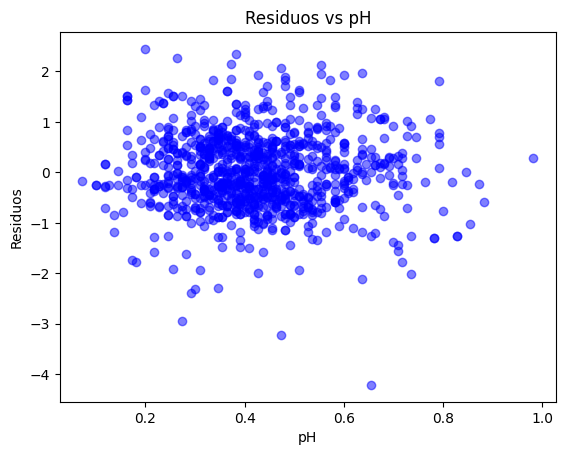

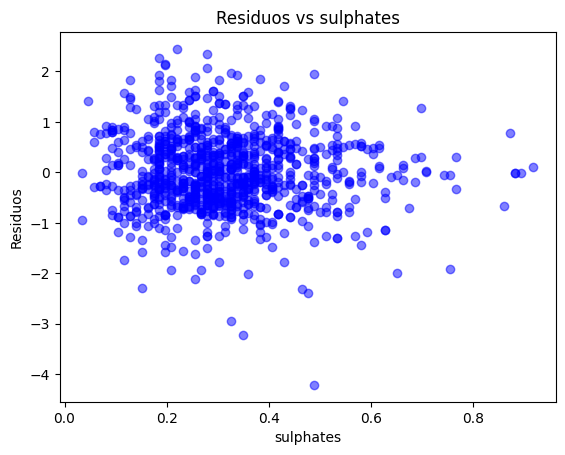

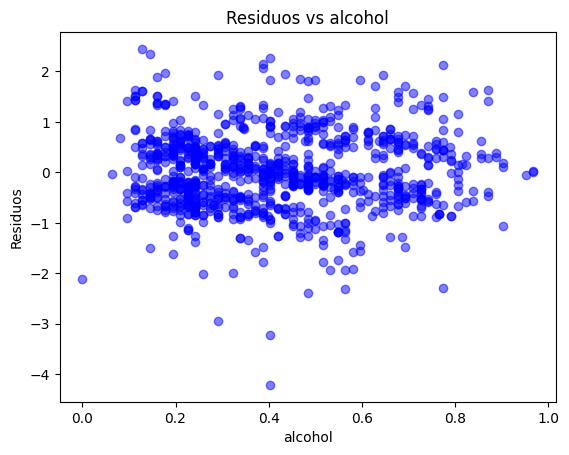

In [60]:
Y_pred_test=f[2]

# ¿Los residuos son normales?
errores=Y_test-Y_pred_test

# Visualización de cada una de las variables X en el set de test
for column in X_test.columns:
    plt.scatter(X_test[column], errores, color="blue", alpha=0.5)
    plt.title(f"Residuos vs {column}")
    plt.xlabel(column)
    plt.ylabel("Residuos")
    plt.show()

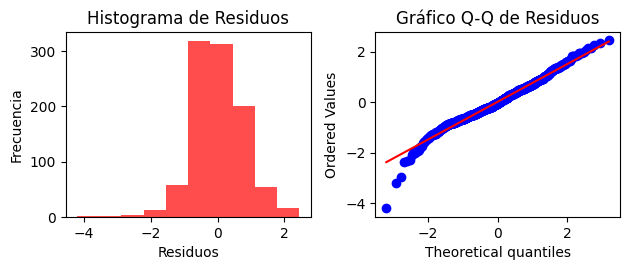

In [61]:
# Histograma de residuos
plt.subplot(2, 2, 1)
plt.hist(errores, bins=10, color='red', alpha=0.7)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

# Gráfico Q-Q de residuos
plt.subplot(2, 2, 2)
stats.probplot(errores, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Residuos')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

## LinearRegression  - model 1 - without density

X variables: {'fixed acidity', 'sulphates', 'alcohol', 'free sulfur dioxide', 'pH', 'total sulfur dioxide', 'residual sugar', 'chlorides', 'volatile acidity', 'citric acid'}
Coeficientes de la regresión lineal: [-0.53870144 -2.04855089 -0.17288497  1.60067983 -0.21097364  1.71858507
 -0.30678852  0.17655205  0.40347294  2.282599  ]
Intercepto: 5.112588243002659


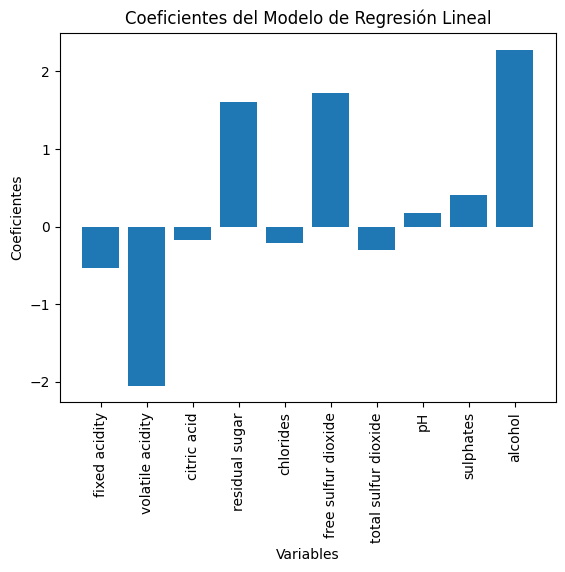

 LinearRegression - R^2 test: 0.24758463598218483
 LinearRegression - MSE test: 0.5827254866908652


In [62]:
# Quitamos la variable de density
columns_to_drop=["density"]
X_train_lr = X_train.drop(columns=columns_to_drop, axis=1)
X_test_lr = X_test.drop(columns=columns_to_drop, axis=1)
X_lr = X.drop(columns=columns_to_drop, axis=1)

# Ajuste del Modelo de Regresión Lineal
modelo= LinearRegression()
modelo.fit(X_train_lr, Y_train)

# Coeficientes del modelo
linear_regression_coef(X_lr, modelo)

# Evaluación del modelo
f=linear_regression_evaluation(X_test_lr, Y_test, modelo)

# R2 y MSE
r2_model_1 = f[0]
mse_model_1 = f[1]


## LinearRegression - model 2 - without total sulfur dioxide

X variables: {'fixed acidity', 'sulphates', 'alcohol', 'free sulfur dioxide', 'pH', 'residual sugar', 'chlorides', 'volatile acidity', 'citric acid'}
Coeficientes de la regresión lineal: [-0.57878913 -2.09871435 -0.1901934   1.55268406 -0.22656947  1.45123924
  0.15406423  0.38278262  2.32168686]
Intercepto: 5.082954209037158


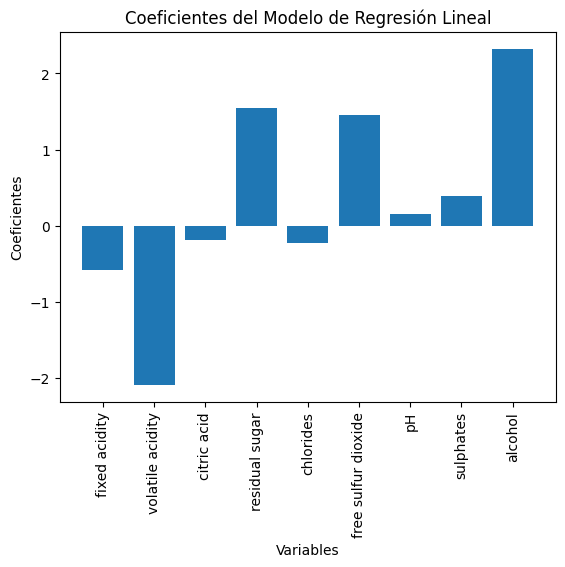

 LinearRegression - R^2 test: 0.24578909611814825
 LinearRegression - MSE test: 0.5841160840805257


In [63]:
# Quitamos la variable de "density",'pH'
columns_to_drop=["density",'total sulfur dioxide']
X_train_lr = X_train.drop(columns=columns_to_drop, axis=1)
X_test_lr = X_test.drop(columns=columns_to_drop, axis=1)
X_lr = X.drop(columns=columns_to_drop, axis=1)

# Ajuste del Modelo de Regresión Lineal
modelo= LinearRegression()
modelo.fit(X_train_lr, Y_train)

# Coeficientes del modelo
linear_regression_coef(X_lr, modelo)

# Evaluación del modelo
f=linear_regression_evaluation(X_test_lr, Y_test, modelo)

# R2 y MSE
r2_model_2 = f[0]
mse_model_2 = f[1]


## LinearRegression - model 3 - without fixed acidity

X variables: {'sulphates', 'alcohol', 'pH', 'chlorides', 'residual sugar', 'free sulfur dioxide', 'volatile acidity', 'citric acid'}
Coeficientes de la regresión lineal: [-2.10345974 -0.34994515  1.57380966 -0.17491604  1.52167415  0.28982143
  0.37279101  2.34876366]
Intercepto: 4.863935407785133


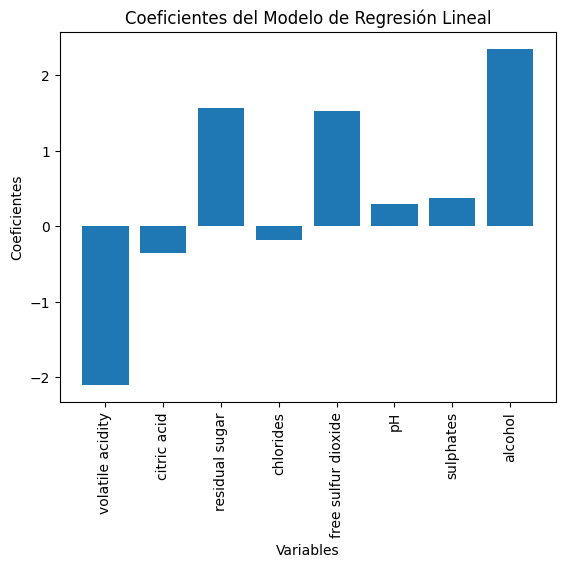

 LinearRegression - R^2 test: 0.24353457096601328
 LinearRegression - MSE test: 0.5858621532457262


In [64]:
# Quitamos la variables
columns_to_drop=["density",'total sulfur dioxide','fixed acidity']
X_train_lr = X_train.drop(columns=columns_to_drop, axis=1)
X_test_lr = X_test.drop(columns=columns_to_drop, axis=1)
X_lr = X.drop(columns=columns_to_drop, axis=1)

# Ajuste del Modelo de Regresión Lineal
modelo= LinearRegression()
modelo.fit(X_train_lr, Y_train)

# Coeficientes del modelo
linear_regression_coef(X_lr, modelo)

# Evaluación del modelo
f=linear_regression_evaluation(X_test_lr, Y_test, modelo)

# R2 y MSE
r2_model_3 = f[0]
mse_model_3 = f[1]


## Supuestos de la regression lineal - modelo 3

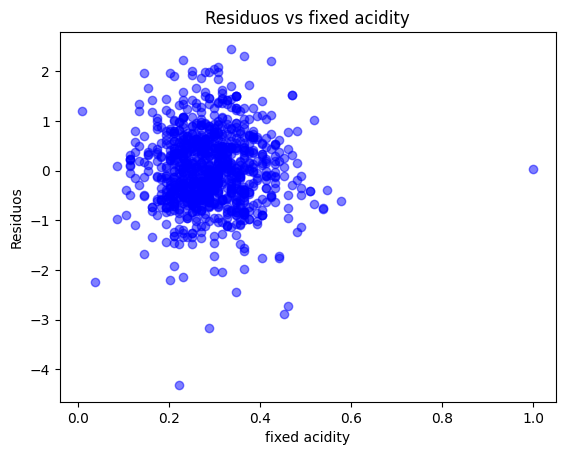

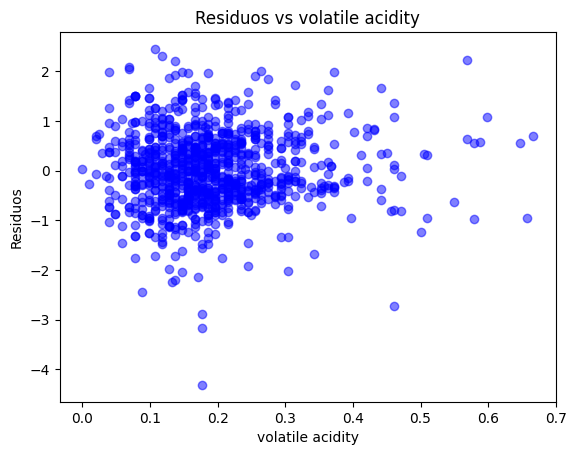

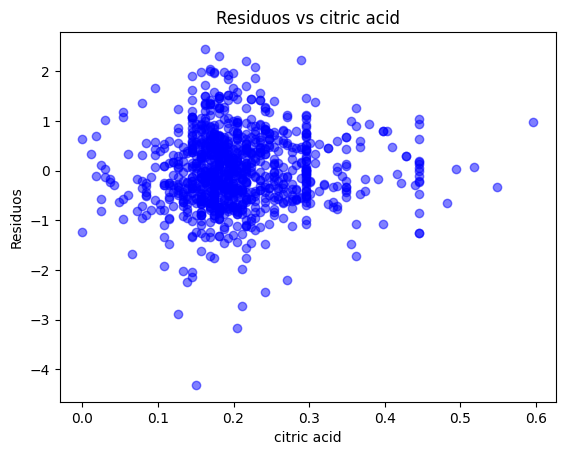

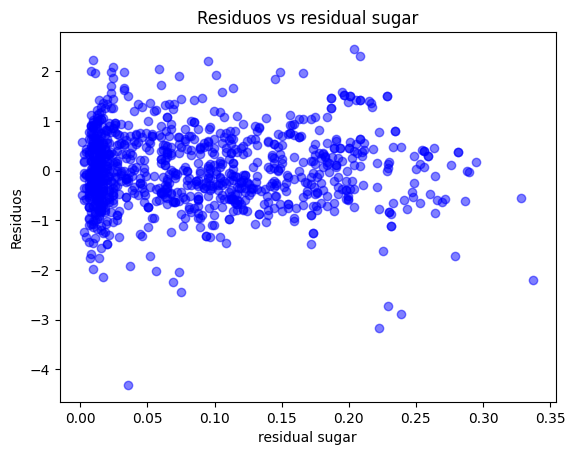

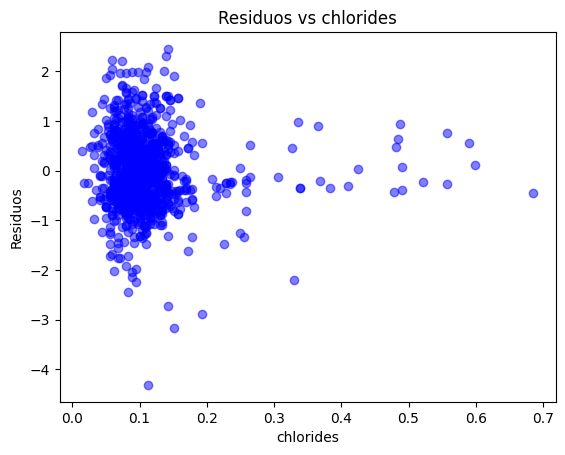

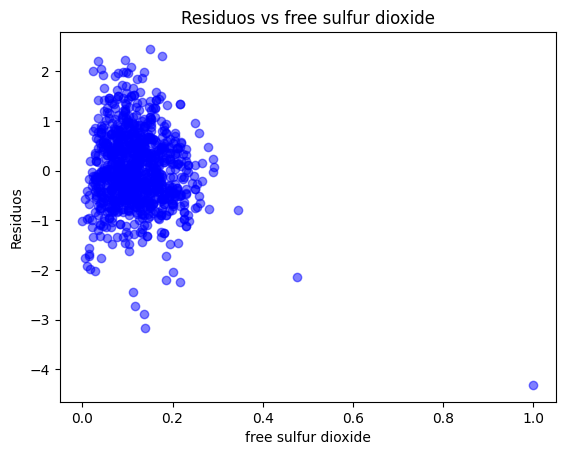

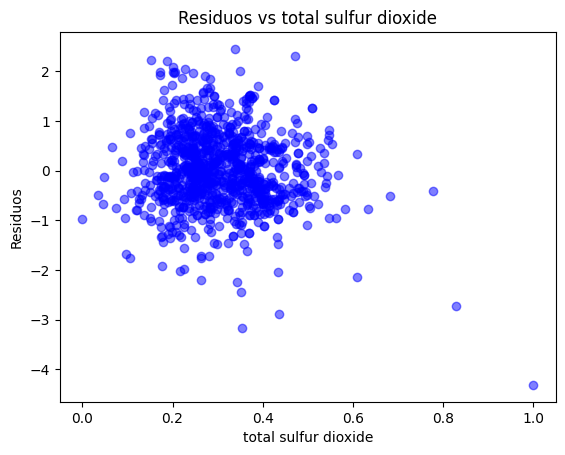

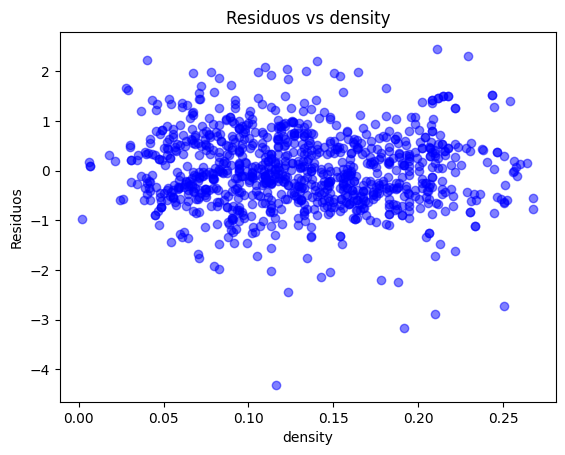

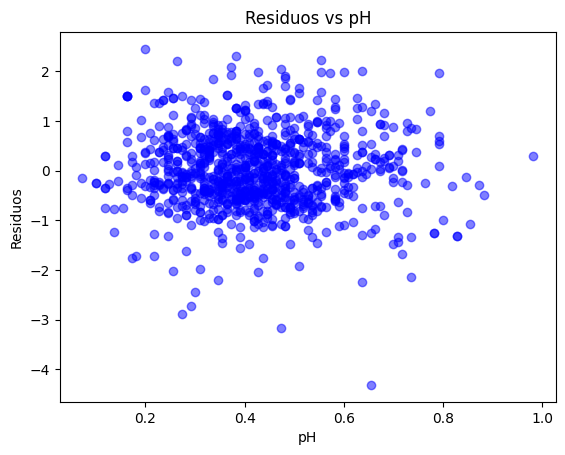

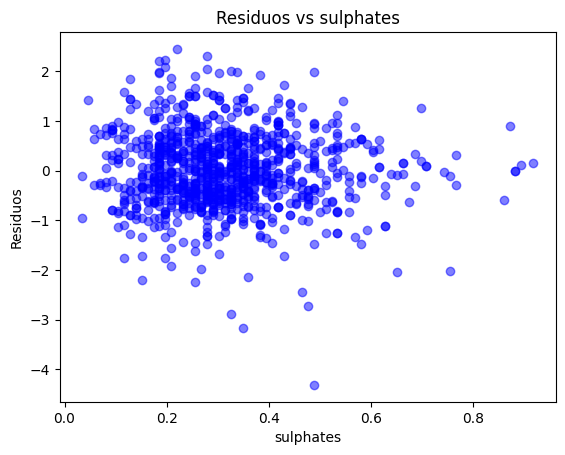

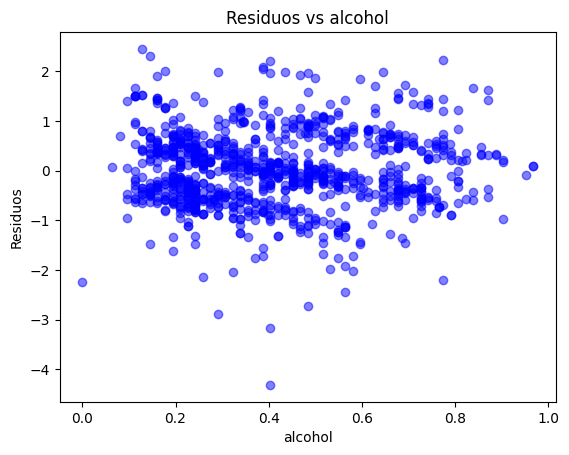

In [65]:
Y_pred_test = f[2]

# ¿Los residuos son normales?
errores=Y_test-Y_pred_test

# Visualización de cada una de las variables X en el set de test
for column in X_test.columns:
    plt.scatter(X_test[column], errores, color="blue", alpha=0.5)
    plt.title(f"Residuos vs {column}")
    plt.xlabel(column)
    plt.ylabel("Residuos")
    plt.show()

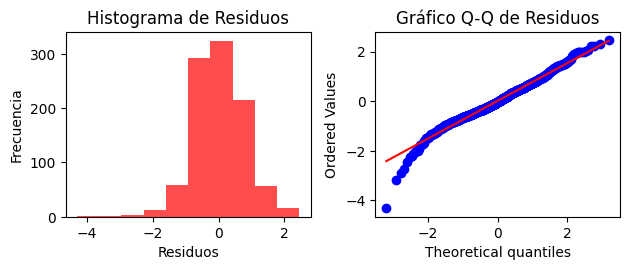

In [66]:
# Histograma de residuos
plt.subplot(2, 2, 1)
plt.hist(errores, bins=10, color='red', alpha=0.7)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

# Gráfico Q-Q de residuos
plt.subplot(2, 2, 2)
stats.probplot(errores, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Residuos')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# Tabla resumen de modelos

In [67]:
# Datos para el DataFrame
data = {
    'Modelo': ['LinearRegression_all_variables', 'model_1', 'model_2', 'model_3'],
    'R2': [r2_all, r2_model_1, r2_model_2, r2_model_3],
    'MSE': [mse_all, mse_model_1, mse_model_2, mse_model_3]
}

# Crear el DataFrame
df = pd.DataFrame(data)

display(df)

Modelo        R2       MSE
0  LinearRegression_all_variables  0.265275  0.569025
1                         model_1  0.247585  0.582725
2                         model_2  0.245789  0.584116
3                         model_3  0.243535  0.585862